<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류(Classification)의 개요

**지도학습**은 레이블, 즉 **명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식**이다. 지도학습의 대표적인 유형인 **분류**는 **학습 데이터로 주어진 데이터의 피처와 레이블값(결정값, 클래스 값)**을 머신러닝 알고리즘으로 학습해 모델을 생성하고, 이렇게 생성된 모델에 **새로운 데이터 값이 주어졌을 때 미지의 레이블 값을 예측하는 것이다.** 즉 기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤 새롭게 관측된 데이터에 대한 레이블을 판별하는 것이다. 

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.

- 베이즈 통계와 생성 모델에 기반한 **나이브 베이즈**(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 **로지스틱 회귀**(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 **결정트리**(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 **서포트 벡터 머신**(Support Vector Machine)
- 근접 거리를 기준으로 하는 **최소 근접**(Nearest Neighbor) 알고리즘
- 심층 연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 **앙상블**(Ensemble)

다양한 알고리즘들 중 앙상블을 집중적으로 공부해보겠다. 앙상블은 서로 다른 또는 같은 알고리즘을 단순히 결합한 형태도 있으나 일반적으로 **배깅**과 **부스팅** 방식으로 나뉜다. 배깅 방식의 대표인 **랜덤 포레스트**는 *뛰어난 예측 성능, 상대적으로 빠른 수행시간, 유연성* 등으로 애용하는 사람 이 많다. 하지만 근래의 앙상블 방법은 **부스팅 방식**으로 지속해서 발전하고 있다. **그래디언트 부스팅**의 경우 뛰어난 예측 성능을 가지고 있지만 수행 시간이 너무 오래 걸리는 단점으로 인해 최적화 모델 튜닝이 어려웠다. 하지만 `XGBoost`와 `LightGBM` 등 기존 그래드언트 부스팅의 예측 성능을 한 단계 발전 시키면서도 수행 시간을 단축시킨 알고리즘이 계속 등장하며서 정형 데이터의 분류 영역에서 가장 활용도가 높은 알고리즘을 자리잡았다. 

앙상블의 기본 알고리즘으로 일반적으로 사용하는 것은 **결정트리**이다. 또한 데이터의 스케일링이나 정규화 등의 사전 가공의 영향이 매우 적다. 하지만 예측 성능을 향상시키기 위해 복잡한 규칙 구조를 가져야 하며, 이로 인한 과적합이 발생해 반대로 예측 성능이 저하될 수 있다는 단점이 있다. 하지만 이런 단점이 앙상블 기번에서는 오히려 장점으로 작용한다. 앙상블은 매우 많은 여러개의 약한 학습기를 결합해 확률적 보완과 오류가 발생한 부분에 대한 가중치를 계속 업데이트 하면서 예측 성능을 향상시키는데 결정트리가 좋은 약한 학습기가 되기 때문이다.

## 결정트리

결정트리는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘이다. 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것이다. 일반적으로 규칙을 가장 쉽게 표현하는 방법은 if/else 기반으로 나타내는 것이다. 쉽게 말하면 스무고개 같은 것. 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우한다. 

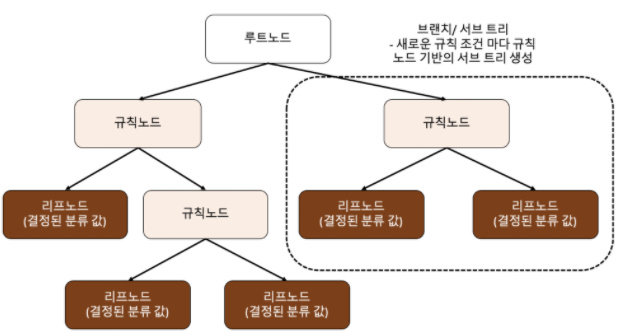

규칙 노드로 표시된 노드는 규칙 조건이 되는 거고, 리프 노드로 표시된 노드는 결정된 클래스 값이다. 새로운 규칙 조건마다 서브 트리가 생성된다. 데이터 세트에 피처가 있고 이러한 피처가 결합해 규칙 조건을 만들 떄 마다 규칙 노드가 만들어진다. 하지만 많은 규칙이 있다는 것은 곧 분류를 결정하는 방식이 더욱 복잡해진다는 얘기이고, 이는 곧 과적합으로 이어지기 쉽다. 즉 **트리의 깊이가 깊어질수록 결정트리의 예측 성능이 저하될 가능성이 높다.** 

데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정 노드의 규칙이 정해져야 한다. 이를 위해서는 어떻게 트리를 분할 할 것인가가 중요하다.

## 결정트리의 시각화

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#decisionTree Classifier 설정
dt_clf=DecisionTreeClassifier(random_state=156)

#붓꽃 데이터를 로딩하고 학습과 테스트 데이터 세트로 분리
iris_data=load_iris()
X_train,X_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target,test_size=0.2,random_state=11)

#DecisionTreeClassifier 학습
dt_clf.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

사이킷런의 트리 모듈은 Graphviz를 이용하기 위해 export_graphviz()함수를 제공한다. 
export_graphviz()에 인자로 학습이 완료된 estimator,output 파일 명 결정 클래스의 명칭, 피처의 명칭을 입력해주면 된다>

In [ ]:
from sklearn.tree import export_graphviz

#export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf,out_file='tree.dot',class_names=iris_data.target_names,
                feature_names=iris_data.feature_names,impurity=True,filled=True)

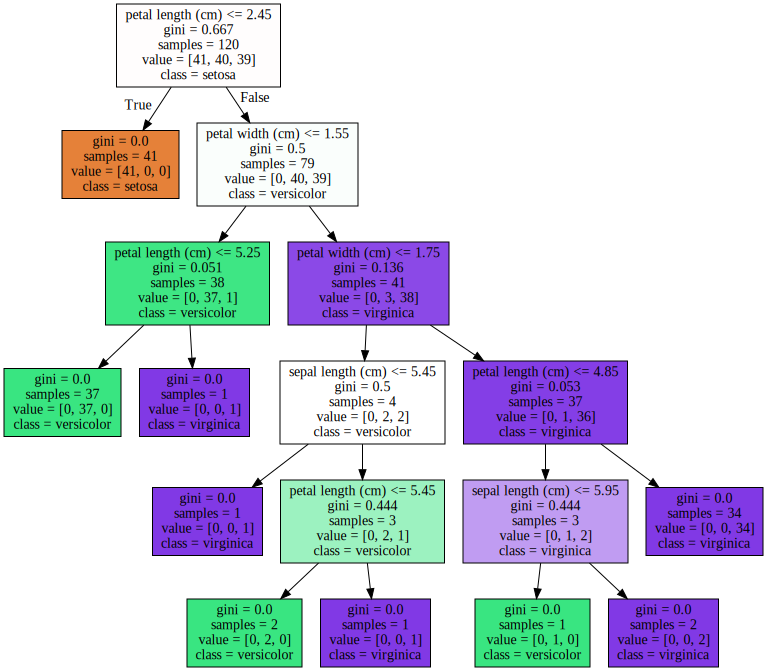

In [ ]:
import graphviz
#위에서 생성된 tree.dot 파일을 graphiz가 읽어서 주피터 노트북상에서 시각화
with open('tree.dot') as f:
  dot_graph=f.read()
  
graphviz.Source(dot_graph)

feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm) : 0.025
sepal width (cm) : 0.000
petal length (cm) : 0.555
petal width (cm) : 0.420


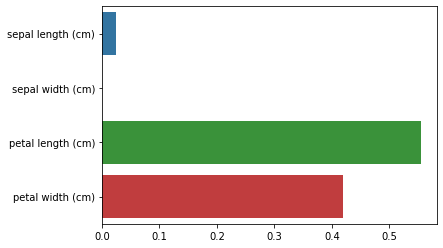

In [ ]:
import seaborn as sns
import numpy as np
%matplotlib inline

#feature importance 추출
print("feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

#feature별 importance 매핑
for name,value in zip(iris_data.feature_names,dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name,value))

#feature importance를 columns 별로 시각화
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

petal length가 가장 피처 중요도가 높음을 알 수 있따.

## 결정 트리 과적합(overfitting_

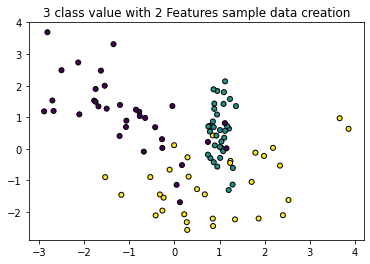

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 class value with 2 Features sample data creation")

#2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features,y_labels=make_classification(n_features=2,n_redundant=0,n_informative=2,
                                        n_classes=3,n_clusters_per_class=1,random_state=0)

#그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0],X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

In [ ]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

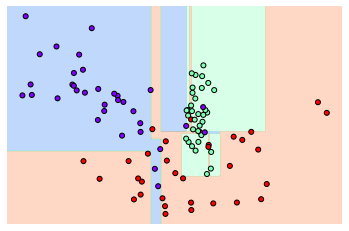

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화
dt_clf=DecisionTreeClassifier().fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

일부 이상치 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌다. 이렇게 복잡한 모델은 학습 데이터 세트의 특성과 약간만 다른 형태의 데이터 세트를 예측하면 예즉 정확도가 떨어지게 된다. -> overfittting

그래서 min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화

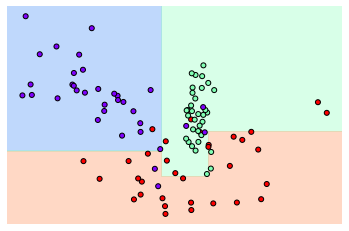

In [ ]:
#min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

# 앙상블

앙상블 학습을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말한다. 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것이다.

이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이고 있지만, 대부분의 정형 데이터 분류시에는 **앙상블**이 뛰어난 성능을 나타내고 있다. 앙상블 알고리즘의 대표격인 랜덤 포레스트와 그래디언트 부스팅 알고리즘은 뛰어난 성능과 쉬운 사용, 다양한 활용도로 인해 많은 사람들이 애용했다. 

앙상블 학습의 유형은 전통적으로, **보팅, 배깅, 부스팅** 의 세가지로 나눌 수 있으며 이외에도 스태깅을 포함한 다양한 앙상블 방법이 있다. 보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 보팅과 배깅의 다른 점은 **보팅의 경우 일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것이다.** 대표적인 배깅 방식이 바로 **랜덤 포레스트 알고리즘**이다.

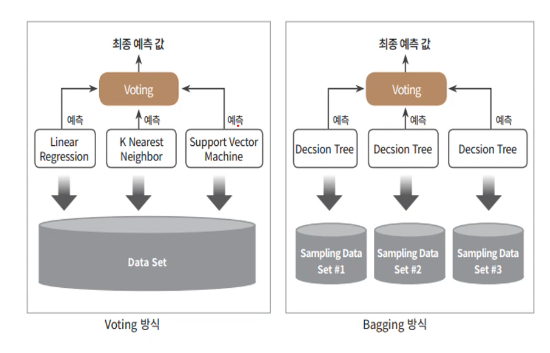

단일 ML알고리즘(결정 트리)로 여러 분류기가 학습으로 개별 예측을 하는데, 학습하는 데이터 세트가 보팅 방식과는 다르다. 개별 분류기에 할당된 학습 데이터는 원본 학습 데이터를 샘플링해 추출하는데, 이렇게 **개별 classifier에게 데이터를 샘플링해서 추출하는 방식**을 **부트스트래핑 분할 방식**이라고 부른다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해서 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해서 최종 예측 결과를 선정하는 방식이 바로 배깅 앙상블 방식이다. 교차검증이 데이터 세트 간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용한다. 따라서 10000개의 데이터를 10개의 분류기가 배깅 방식으로 나누더라도 각 1000개의 데이터 내에는 중복된 데이터가 있다. 

부스팅은 여러개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행한다. 예측 성능이 뛰어난 앙상블 학습을 주도하고 있으며 대표적인 부스팅 모듈로 `그래디언트 부스트`, `XGBoost`,`LightGBM` 이 있다.


In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기를 만들어보겠다. 사이킷런은 VotingClassifier 클래스를 이용해 보팅 분류기를 생성할 수 있다. otingClassifier 클래스는 주로 생성 인자로 estimators와 voting 값을 입력받는다. estimators는 리스트 값으로 보팅에 사용될 여러 개의 classifier객체들을 튜플 형식으로 입력받으며 voting은 hard 시 하드모팅, soft시 소프트 보팅 방식을 적용하라는 의미이다. 

In [6]:
#개별 모델은 로지스틱 회귀와 KNN
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=156)

#VotingClassifier 학습/예측 평가
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test)
print("Voting 분류기 정확도:{0:.4f}".format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측/평가
classifiers=[lr_clf,knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred=classifier.predict(X_test)
  class_name=classifier.__class__.__name__
  print('{0} 정확도:{1:.4f}'.format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도:0.9474
LogisticRegression 정확도:0.9386
KNeighborsClassifier 정확도:0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
